In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from prettytable import PrettyTable

labels=[]
preds=[]
dbfile = open('./knn-predictions/base-test-predictions-1575836051.143159.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_base')
dbfile.close()
dbfile = open('./knn-predictions/basic-test-predictions-1575835928.691891.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_basic')
dbfile.close()
dbfile = open('./knn-predictions/d2v-test-predictions-1575836012.216281.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('knn_d2v')
dbfile.close()

dbfile = open('./nn-final-models/base-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_base')
dbfile.close()
dbfile = open('./nn-final-models/basicname-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_basic')
dbfile.close()
dbfile = open('./nn-final-models/doc2vec-test-predictions-1575835107.478405.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('nn_d2v')
dbfile.close()

dbfile = open('./svm-predictions/base-test-predictions-1575838424.324989.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_base')
dbfile.close()
dbfile = open('./svm-predictions/basic-test-predictions-1575835932.142707.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('svm_basic')
dbfile.close()

dbfile = open('./Figures/LogReg/BaseDataset/yhat_TEST_Base.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_base')
dbfile.close()
dbfile = open('./Figures/LogReg/BasicNamesDataSet/yhat_TEST_BasicName.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_basic')
dbfile.close()
dbfile = open('./Figures/LogReg/Doc2VecDataSet/yhat_TEST_Doc2Vec.pickle', 'rb')
preds.append(pickle.load(dbfile))
labels.append('LogReg_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/Ada_Pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_base')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_basic')
dbfile.close()
dbfile = open('./Curry_Figs/Ada_Pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('Ada_d2v')
dbfile.close()

dbfile = open('./Curry_Figs/rfc_pred0', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_base')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred1', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_basic')
dbfile.close()
dbfile = open('./Curry_Figs/rfc_pred2', 'rb')
preds.append(pickle.load(dbfile))
labels.append('RFC_d2v')
dbfile.close()

y_test=np.array(pd.read_csv("./data/preprocess-base-y-test.csv")['success'])

In [4]:
for i in range(len(preds)):
    preds[i]=preds[i].flatten()
    
for i in range(len(preds)):
    preds[i]=preds[i].tolist()
    
for i in range(len(preds)):
    if type(preds[i][0])!=type(True):
        for j in range(len(preds[0])):
            preds[i][j]=True if preds[i][j] >= .5 else False
preds=np.asarray(preds)

In [ ]:
def comparePredictions(predictions,modelNames):
    l={}
    n_pred=len(predictions[0])
    tbl=np.zeros((len(predictions)+1,len(predictions)+1)).tolist()
    tbl[0][0]=''
    for i,n1 in zip(range(len(predictions)),modelNames):
        tbl[0][i+1]=n1
        tbl[i+1][0]=n1
        for j,n2 in zip(range(len(predictions)),modelNames):
            
            c=0
            for k in range(n_pred):
                if predictions[i][k]==predictions[j][k]:
                    c+=1
            
            tbl[i+1][j+1]=round(c/n_pred*100,0)
            l[n1+' '+n2]=round(c/n_pred*100,0)
#     print(tbl)
    return tbl

In [9]:
def allWrongPredictions(predictions,y_test,modelNames):
    all_faileds=[]
    for k in range(len(y_test)):
        all_failed=True
        for i in predictions:
            if i[k]==y_test[k]:
                all_failed=False
        if all_failed:
            all_faileds.append(k)
    return all_faileds
wrong=allWrongPredictions(preds,y_test,labels)

In [17]:
df=pd.read_csv("./data/preprocess-base-x-test.csv")
print(wrong[:20])

[20, 28, 40, 50, 69, 88, 120, 125, 138, 161, 182, 184, 185, 190, 195, 196, 203, 206, 220, 229]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B57D106588>,
      dtype=object)

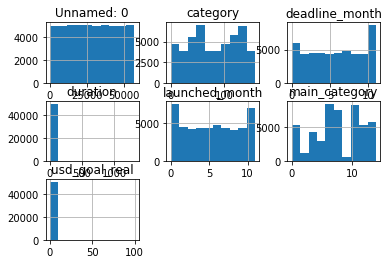

In [20]:
df.hist()

In [19]:
df.iloc[wrong].head(10)

,Unnamed: 0,main_category,category,duration,usd_goal_real,launched_month,deadline_month
20,24,9,77,2.086260,-0.034459,3.0,5.0
28,33,6,153,-0.329163,-0.027208,2.0,3.0
40,46,10,72,-0.324727,-0.033552,3.0,4.0
50,58,2,32,-0.336801,-0.036725,9.0,10.0
69,78,8,148,-0.326634,-0.009987,9.0,10.0
88,98,5,52,0.226628,-0.027208,3.0,4.0
120,132,10,68,-0.270878,-0.033099,0.0,1.0
125,137,6,153,2.058490,-0.032646,2.0,4.0
138,152,8,63,0.889259,-0.028114,1.0,3.0
161,176,6,153,-0.341133,-0.032646,5.0,6.0


['main_category', 'category', 'duration', 'usd_goal_real', 'launched_month', 'deadline_month']


ValueError: `bins` must increase monotonically, when an array

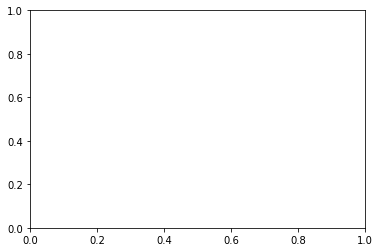

In [27]:
print(list(df.columns)[1:])
cols=['main_category','launched_month','deadline_month']

df.hist(column='main_category',bins=df.main_category.unique())
df.hist(column='launched-month',bins=df.launched-month.unique())
df.hist(column=col,bins=df.da.unique())

In [ ]:
df.loc(wrong)